In [ ]:
!pip install opencv-python albumentations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import time
import cv2

import uuid

In [ ]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [ ]:
cap = cv2.VideoCapture(1)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    # cv2.imwrite(imgname, frame)
    # cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

### Annotate Images with LabelMe

In [ ]:
#!labelme

### Review Dataset and Build Image Loading Function

In [ ]:
import tensorflow as tf
import json
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)
# tf.config.list_physical_devices('GPU')


###  Load Image into TF Data Pipeline

In [ ]:
images=tf.data.Dataset.list_files("/content/drive/MyDrive/data/images/*.jpeg")

In [ ]:
images.as_numpy_iterator().next()

b'/content/drive/MyDrive/data/images/5ea6a740-007f-11ee-8326-588a5a1237b1.jpeg'

In [ ]:
def load_img(x):
  byte_img=tf.io.read_file(x)
  img=tf.io.decode_jpeg(byte_img)
  return img

In [ ]:
images=images.map(load_img)

In [ ]:
images.as_numpy_iterator().next()

array([[[ 84, 110, 101],
        [ 77, 103,  94],
        [ 78,  99,  90],
        ...,
        [ 53,  55,  50],
        [ 52,  57,  51],
        [ 52,  57,  51]],

       [[ 84, 105,  98],
        [ 81, 102,  95],
        [ 82, 101,  95],
        ...,
        [ 54,  56,  51],
        [ 53,  58,  54],
        [ 52,  57,  51]],

       [[ 86, 101,  98],
        [ 86, 101,  96],
        [ 86, 101,  96],
        ...,
        [ 53,  55,  52],
        [ 54,  56,  55],
        [ 54,  56,  53]],

       ...,

       [[ 79,  97, 101],
        [ 78,  98,  99],
        [ 79, 101,  99],
        ...,
        [ 73,  77,  80],
        [ 75,  76,  81],
        [ 77,  77,  85]],

       [[ 87, 107, 108],
        [ 80, 102, 100],
        [ 69,  96,  91],
        ...,
        [ 67,  72,  76],
        [ 70,  73,  82],
        [ 74,  77,  86]],

       [[ 89, 110, 111],
        [ 89, 114, 111],
        [ 90, 117, 112],
        ...,
        [ 62,  67,  73],
        [ 68,  71,  80],
        [ 72,  74,  86]]

In [ ]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

### View Raw Images with Matplotlib

In [ ]:

img_generator= images.batch(4).as_numpy_iterator()

In [ ]:
plot_images=img_generator.next()

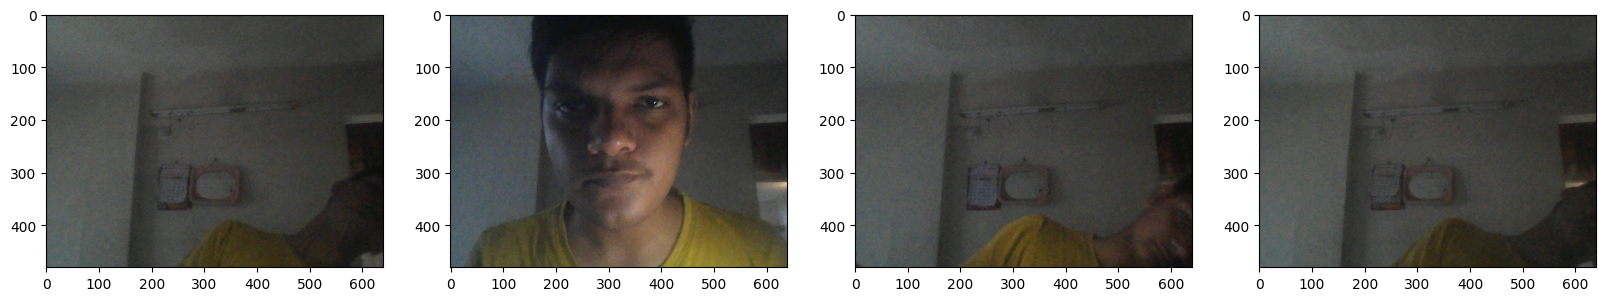

In [ ]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,image in enumerate(plot_images):
  ax[idx].imshow(image)
plt.show()

In [ ]:
plot_images[0].shape
# images shape

(480, 640, 3)

### Partition Unaugmented Data

In [ ]:

len(list(images.as_numpy_iterator()))
# total images count

117

In [ ]:

import random

root_dir="/content/drive/MyDrive/data/"

all_imgs=os.listdir(os.path.join(root_dir,"images"))
all_labels=os.listdir(os.path.join(root_dir,"label"))

# test_ratio=0.1
# val_ratio=0.1
# zip_file[:5]

In [ ]:
.8*117,.1*117,93+12+12

(93.60000000000001, 11.700000000000001, 117)

In [ ]:
train_imgs,val_imgs,test_imgs=np.split(all_imgs,[93,105])

In [ ]:
len(train_imgs),len(test_imgs),len(val_imgs)

(93, 12, 12)

In [ ]:

# !pip install split-folders
# https://pypi.org/project/split-folders/
# import splitfolders
# splitfolders.ratio("/content/drive/MyDrive/data/images",output="/content/drive/MyDrive/data",seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)

# due to different format of input folder please refere site

In [ ]:
train_imgs_loc=[root_dir+'images/'+name for name in train_imgs]
test_imgs_loc=[root_dir+'images/'+name for name in test_imgs]
val_imgs_loc=[root_dir+'images/'+name for name in val_imgs]

In [ ]:
print("Total imgs ",len(all_imgs))
print("Train imgs ",len(train_imgs_loc))
print("Test imgs ",len(test_imgs_loc))
print("Val imgs ",len(val_imgs_loc))

Total imgs  117
Train imgs  93
Test imgs  12
Val imgs  12


In [ ]:
import shutil

#  module offers high-level operation on a file like a copy, create, and remote operation on the file
# preserves the file’s permission mode
# other metadata of the file like the file’s creation and modification times is not preserved.

dest_dir="/content/drive/MyDrive/data"

for name in train_imgs_loc:
  shutil.copy(name,dest_dir+'/train/images')

for name in test_imgs_loc:
  shutil.copy(name,dest_dir+'/test/images')

for name in val_imgs_loc:
  shutil.copy(name,dest_dir+'/val/images')

In [ ]:

for folder in ['train','test','val']:
  for f in os.listdir(os.path.join('/content/drive/MyDrive/data',folder,'images')):
    filename=f.split('.')[0]+'.json'
    existing_filepath=os.path.join('/content/drive/MyDrive/data','label',filename)
    if os.path.exists(existing_filepath):
      new_path=os.path.join('/content/drive/MyDrive/data',folder,'labels',filename)
      os.replace(existing_filepath,new_path)


# On POSIX systems, the rename system call will silently replace the destination file
# if the user has sufficient permissions.
# The same is not true on Windows.
# os.replace and os.rename are the same function on POSIX systems, but on Windows
# os.replace will call MoveFileExW with the MOVEFILE_REPLACE_EXISTING flag set to give the same effect as on POSIX systems.



In [ ]:

### Apply Image Augmentations On Image and label by using albumentations

In [ ]:
import albumentations as alb

In [ ]:
# from albumentations.augmentations.transforms import RandomBrightnessContrast


# augmentor no object banayo with what to do when image it given
augmentor=alb.Compose([alb.RandomCrop(width=450,height=450),
                       alb.HorizontalFlip(p=0.5),
                       alb.RandomBrightnessContrast(p=0.2),
                       alb.RandomGamma(p=0.2),
                       alb.VerticalFlip(p=0.5),
                       alb.RGBShift(p=0.2)],

                      bbox_params=alb.BboxParams(format='albumentations',label_fields=['class_labels'])
                      )


# check out website for more insights ( BboxParams format... and more...)

### Load a Test Image and Annotation with OpenCV and JSON

In [ ]:
img=cv2.imread(os.path.join("/content/drive/MyDrive/data","train","images","12d64cfc-0080-11ee-b866-588a5a1237b1.jpeg"))


In [ ]:
with open(os.path.join("/content/drive/MyDrive/data","train","labels","12d64cfc-0080-11ee-b866-588a5a1237b1.json"),"r") as f:
  label=json.load(f)

In [ ]:
label

{'version': '5.2.1',
 'flags': {},
 'shapes': [{'label': 'face',
   'points': [[195.38071065989845, 109.54314720812182],
    [379.6446700507614, 403.4517766497462]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {}}],
 'imagePath': '..\\images\\12d64cfc-0080-11ee-b866-588a5a1237b1.jpeg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQgJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYG

In [ ]:
label['shapes'][0]

{'label': 'face',
 'points': [[195.38071065989845, 109.54314720812182],
  [379.6446700507614, 403.4517766497462]],
 'group_id': None,
 'description': '',
 'shape_type': 'rectangle',
 'flags': {}}

#### Extract Coordinates and Rescale to Match Image-Resolution

In [ ]:
label['shapes'][0]['points']

[[195.38071065989845, 109.54314720812182],
 [379.6446700507614, 403.4517766497462]]

In [ ]:
coords=np.array(label['shapes'][0]['points']).reshape(4,)
coords

array([195.38071066, 109.54314721, 379.64467005, 403.45177665])

In [ ]:
coords=np.divide(coords,[640,480,640,480])

In [ ]:
coords
# finding coordinate of rectangle (top leftmost to bottom rightmost)

array([0.30528236, 0.22821489, 0.5931948 , 0.84052453])

### Apply Augmentations and View Results

In [ ]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

# bounding box ma labeled coordinates aapva

# dict (image)  return kareshe je augmented image with label and class_label


In [ ]:
augmented['bboxes']

[(0.5607896221094191,
  0.2123181049069374,
  0.9702650874224479,
  0.8654483925549915)]

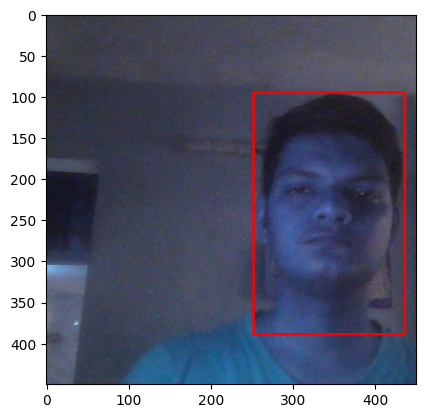

In [ ]:
cv2.rectangle(
              augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2],[450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:],[450,450]).astype(int))
              ,(255,0,0),2
              )
plt.imshow(augmented['image'])

In [ ]:
tuple(np.multiply(augmented['bboxes'][0][:2],[450,450]).astype(int))

(252, 95)

In [ ]:
augmented['bboxes'][0][:2]

(0.5607896221094191, 0.2123181049069374)

In [ ]:
for folder in ["train","test","val"]:
  for image in os.listdir(os.path.join("/content/drive/MyDrive/data",folder,"images")):
    img=cv2.imread(os.path.join("/content/drive/MyDrive/data",folder,"images",image))

    coords= [0,0,0.001,.0001]
    label_path = os.path.join("/content/drive/MyDrive/data",folder,"labels",f'{image.split(".")[0]}.json')

    if(os.path.exists(label_path) ):
          with open(label_path,'r') as f:
            label=json.load(f)

          if len(label['shapes'])==1:
            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

    try:
      for x in range(60):
        augmented=augmentor(image=img,bboxes=[coords],class_labels=['face'])
        cv2.imwrite(os.path.join('/content/drive/MyDrive/augmented_data', folder, 'images', f'{image.split(".")[0]}.{x}.jpg'),
                                    augmented['image'])
        annotation={}
        annotation['images']=image

        if os.path.exists(label_path):
          if len(augmented["bboxes"])==0:
            annotation['bbox']=[0,0,0,0]
            annotation['class']=0
          else:
            annotation['bbox']=augmented['bboxes'][0]
            annotation['class']=1
        else:
          annotation['bbox']=[0,0,0,0]
          annotation['class']=0

        with open(os.path.join('/content/drive/MyDrive/augmented_data',folder,'labels',f'{image.split(".")[0]}.{x}.json'),'w') as f:
          json.dump(annotation,f)

    except Exception as e:
      print(e)

x_max is less than or equal to x_min for bbox [0.7676871827411167, 0.9568527918781726, 0.18393083756345177, 0.0008460236886632944, 'face'].
x_max is less than or equal to x_min for bbox [0.5130869289340102, 0.8859983079526227, 8.881784197001253e-17, 0.021036053133354927, 'face'].
x_max is less than or equal to x_min for bbox [0.13792829949238578, 0.8310067681895094, 0.0, 0.2969567046182378, 'face'].
x_max is less than or equal to x_min for bbox [0.09747779187817258, 0.8764805414551607, 0.0, 0.47393336388418883, 'face'].
x_max is less than or equal to x_min for bbox [0.2481757614213198, 0.8838832487309645, 0.0, 0.270688147064728, 'face'].
x_max is less than or equal to x_min for bbox [0.4274270304568528, 0.7887055837563451, 0.06416560913705582, 0.17639593908629442, 'face'].
x_max is less than or equal to x_min for bbox [0.15061865482233502, 0.9642554991539763, 0.0, 0.6674265403821551, 'face'].
x_max is less than or equal to x_min for bbox [0.9953204314720813, 0.9959813874788495, 0.83351

### load image, resize it

In [ ]:
import tensorflow as tf
train_images=tf.data.Dataset.list_files("/content/drive/MyDrive/augmented_data/train/images/*.jpg",shuffle=False)
train_images=train_images.map(load_img)
train_images=train_images.map(lambda x: tf.image.resize(x,(120,120)))
train_images=train_images.map(lambda x:x/255)

In [ ]:
test_images=tf.data.Dataset.list_files("/content/drive/MyDrive/augmented_data/test/images/*.jpg",shuffle=False)
test_images=test_images.map(load_img)
test_images=test_images.map(lambda x: tf.image.resize(x,(120,120)))
test_images=test_images.map(lambda x:x/255)

In [ ]:
val_images=tf.data.Dataset.list_files("/content/drive/MyDrive/augmented_data/val/images/*.jpg",shuffle=False)
val_images=val_images.map(load_img)
val_images=val_images.map(lambda x: tf.image.resize(x,(120,120)))
val_images=val_images.map(lambda x:x/255)

## Building Label  Function

In [ ]:
def load_labels(label_path):
  with open(label_path.numpy(), 'r', encoding='utf-8') as f:
    label=json.load(f)

  return [label['class']],label['bbox']

### Loading labels by tf

In [ ]:
# Notes for Notes


# >> tf.py_function()
#       Wraps a python function into a TensorFlow op that executes it eagerly.
#       tf.py_function(func, inp, Tout, name=None)
#
#       for more visit:  "https://www.tensorflow.org/api_docs/python/tf/py_function"


#    Disadvantages of using tf.py_function()

#        1) Calling tf.py_function will acquire the Python Global Interpreter Lock (GIL) that allows only
#        one thread to run at any point in time.
#        This will preclude efficient parallelization and distribution of the execution of the program.
#        2) The body of the function (i.e. func) will not be serialized in a GraphDef ,,,to jyare serialzation joie tyare nai
#        3) The operation must run in the """ same address space """ as the Python program that calls tf.py_function().
#        If you are using distributed TensorFlow, you must run a tf.distribute.
#        Server in the same process as the program that calls tf.py_function()
#        and you must pin the created operation to a device in that server (e.g. using with tf.device():)



### Notes about Eager Execution vs. Graph Execution

> Eager execution is a powerful execution environment that evaluates operations immediately. It does not build graphs, and the operations return actual values instead of computational graphs to run later. With Eager execution, TensorFlow calculates the values of tensors as they occur in your code.

>>An **intuitive interface** with natural Python code and data structures;

>> **Easier debugging** with calling operations directly to inspect and test models;

>> **Natural control flow with Python**, instead of graph control flow; and
Support for **GPU & TPU acceleration.**


> Since eager execution runs all operations one-by-one in Python, it cannot take advantage of potential acceleration opportunities italicized text.


>  [more on this: ](https://towardsdatascience.com/eager-execution-vs-graph-execution-which-is-better-38162ea4dbf6#:~:text=Eager%20execution%20is%20a%20powerful,they%20occur%20in%20your%20code.)

In [ ]:
train_labels=tf.data.Dataset.list_files("/content/drive/MyDrive/augmented_data/train/labels/*.json",shuffle=False)
train_labels=train_labels.map(lambda x: tf.py_function(load_labels,[x],[tf.uint8, tf.float16]))

In [ ]:
test_labels=tf.data.Dataset.list_files("/content/drive/MyDrive/augmented_data/test/labels/*.json",shuffle=False)
test_labels=test_labels.map(lambda x: tf.py_function(load_labels,[x],[tf.uint8,tf.float16]))

In [ ]:
val_labels=tf.data.Dataset.list_files("/content/drive/MyDrive/augmented_data/val/labels/*.json",shuffle=False)
val_labels=val_labels.map(lambda x: tf.py_function(load_labels,[x],[tf.uint8,tf.float16]))

In [ ]:
 len(train_labels),  len(test_labels),  len(val_labels)

(5040, 720, 720)

In [ ]:
import os
l=os.listdir("/content/drive/MyDrive/augmented_data/train/images")
len(l)

5040

In [ ]:
l=os.listdir("/content/drive/MyDrive/augmented_data/test/images")
len(l)

720

In [ ]:
l=os.listdir("/content/drive/MyDrive/augmented_data/val/images")
len(l)

720

In [ ]:

train=tf.data.Dataset.zip((train_images,train_labels))
train=train.shuffle(5000)
train=train.batch(8)
train=train.prefetch(4)


# Prefetching
# Prefetching overlaps the preprocessing and model execution of a training step.
#  While the model is executing training step s, the input pipeline is reading the data for step s+1.
#  Doing so reduces the step time to the maximum (as opposed to the sum) of the training and
#  the time it takes to extract the data.

In [ ]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [ ]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1300)
val = val.batch(8)
val = val.prefetch(4)

In [ ]:
import json
train.as_numpy_iterator().next()

(array([[[[0.2536152 , 0.1913603 , 0.1026348 ],
          [0.28284314, 0.21176471, 0.11433823],
          [0.40508577, 0.3127451 , 0.19613971],
          ...,
          [0.35631126, 0.3803309 , 0.390625  ],
          [0.34515932, 0.36476716, 0.38026962],
          [0.3372549 , 0.36666667, 0.36066177]],
 
         [[0.27009803, 0.18529412, 0.09852941],
          [0.3004902 , 0.23529412, 0.11421569],
          [0.37126225, 0.28780636, 0.13394608],
          ...,
          [0.3411152 , 0.3768995 , 0.37297794],
          [0.3668505 , 0.39920342, 0.40643382],
          [0.35447302, 0.38897058, 0.38988972]],
 
         [[0.2471201 , 0.18517157, 0.09074755],
          [0.20189951, 0.15906863, 0.04497549],
          [0.3529412 , 0.2901961 , 0.15545343],
          ...,
          [0.33915442, 0.38621324, 0.3783701 ],
          [0.33694854, 0.38400736, 0.37616423],
          [0.34430146, 0.39136028, 0.38841912]],
 
         ...,
 
         [[0.23535539, 0.23535539, 0.22751226],
          [0.24914

In [ ]:
#train.as_numpy_iterator().next()[1]

In [ ]:
data_samples= train.as_numpy_iterator()

In [ ]:
res= data_samples.next()

In [ ]:
res[1][1]

array([[0.4636 , 0.4326 , 0.8066 , 0.7803 ],
       [0.2042 , 0.     , 0.8823 , 0.866  ],
       [0.1625 , 0.3816 , 0.546  , 0.859  ],
       [0.     , 0.0786 , 0.1802 , 0.6357 ],
       [0.3843 , 0.12054, 0.875  , 0.8525 ],
       [0.02681, 0.     , 0.805  , 0.944  ],
       [0.03595, 0.3926 , 0.512  , 1.     ],
       [0.379  , 0.0695 , 0.849  , 0.764  ]], dtype=float16)

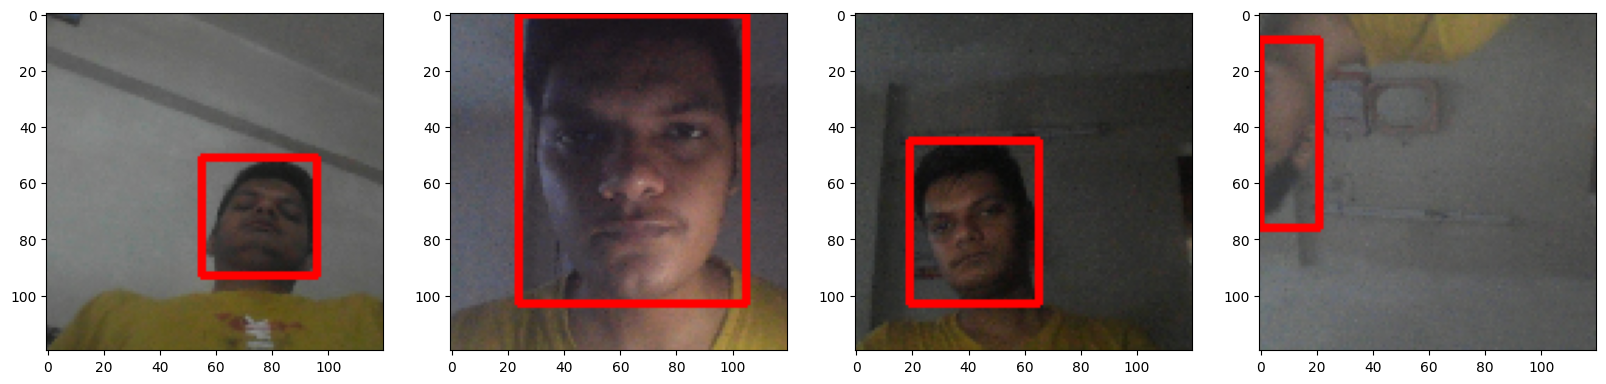

In [ ]:
import cv2
fig,ax =plt.subplots(ncols=4,figsize=(20,20))
for i in range(4):
  sample_img=res[0][i]
  sample_label=res[1][1][i]

  cv2.rectangle(sample_img,
      tuple(np.multiply(sample_label[:2],[120,120]).astype(int)),
      tuple(np.multiply(sample_label[2:],[120,120]).astype(int)),(255,0,0),2)
  ax[i].imshow(sample_img)

## Build Deep Learning using the Functional API

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,Dense,GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

### Download VGG16

In [ ]:
vgg = VGG16(include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
from keras.api._v2.keras import activations
def build_model():
  input_layer=Input(shape=(120,120,3))
  vgg = VGG16(include_top=False)(input_layer)

  # classification for face or not [0,1] == class mate
  f1=GlobalMaxPooling2D()(vgg)
  cl1=Dense(2048,activation='relu')(f1)
  cl2=Dense(1,activation='sigmoid')(cl1)

  # Regression for points coordinates
  f2=GlobalMaxPooling2D()(vgg)
  rl1=Dense(2048,activation='relu')(f2)
  rl2=Dense(256,activation='relu')(rl1)
  rl3=Dense(4,activation='sigmoid')(rl2)


  face_recongiser= Model(inputs=input_layer,outputs=[cl2,rl3])

  return face_recongiser


In [ ]:
face_rec = build_model()

In [ ]:
face_rec.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d_1 (Global  (None, 512)         0           ['vgg16[0][0]']                  
 MaxPooling2D)                                                                                

In [ ]:
X,y=train.as_numpy_iterator().next()

In [ ]:
X.shape

(8, 120, 120, 3)

In [ ]:
pre=face_rec.predict(X)

1/1 [==============================] - 8s 8s/step


In [ ]:
classes=pre[0]
coords=pre[1]
coords

array([[0.2994123 , 0.3913439 , 0.50533557, 0.6242516 ],
       [0.3870626 , 0.4604443 , 0.52369046, 0.57872695],
       [0.33624133, 0.5318479 , 0.5435605 , 0.5440114 ],
       [0.36333317, 0.45433682, 0.4892207 , 0.6050433 ],
       [0.3514228 , 0.48614687, 0.4915525 , 0.5980418 ],
       [0.3870509 , 0.46277082, 0.50147235, 0.5968514 ],
       [0.37014422, 0.4694064 , 0.46262515, 0.547782  ],
       [0.35784042, 0.41657734, 0.43174258, 0.58299905]], dtype=float32)

###  Defining Our Own Losses and Optimizers

In [ ]:
lr_decay= .004/ 1+np.sqrt(len(train))

In [ ]:
opti=tf.keras.optimizers.Adam(learning_rate=.0001,weight_decay=lr_decay)

In [ ]:
def loss(y_true,y_hat):
  x_coord=tf.reduce_sum(tf.square(y_true[:,0]-y_hat[:,0]))+tf.reduce_sum(tf.square(y_true[:,2]-y_hat[:,2]))
  y_coord=tf.reduce_sum(tf.square(y_true[:,1]-y_hat[:,1]))+tf.reduce_sum(tf.square(y_true[:,3]-y_hat[:,3]))

  return x_coord+y_coord

In [ ]:
classification_loss=tf.keras.losses.BinaryCrossentropy()
regression_loss =loss

In [ ]:
regression_loss(y[1],coords).numpy()
#regression loss

3.700073

In [ ]:
classification_loss(y[1],coords).numpy()

0.6404609

### Creating Our Model

In [ ]:
class face_tracker(Model):
  def __init__(self,tracker,**kwargs):
    super().__init__(**kwargs)
    self.model=tracker

  def compile(self, opt, reg_loss, class_loss, **kwargs):
    super().compile(**kwargs)
    self.rloss=reg_loss
    self.closs=class_loss
    self.opt=opt

  def train_step(self,batch,**kwargs):
    X,y=batch

    with tf.GradientTape() as tape:
      classes, coords = self.model(X, training=True)

      #calculated losses
      batch_closs=self.closs(y[0],classes)
      batch_rloss=self.rloss(tf.cast(y[1],tf.float32),coords)

      total_loss = (0.5)*batch_closs  + batch_rloss

      # Gradient
      gradient = tape.gradient(total_loss,self.model.trainable_variables)

      self.opt.apply_gradients(zip(gradient, self.model.trainable_variables))

      return {"total_loss":total_loss, "class_loss":batch_closs, "regress_loss":batch_rloss}


  def test_step(self,batch,**kwargs):
    X,y = batch
    classes, coords = self.model(X, training=False)

    batch_closs=self.closs(y[0],classes)
    batch_rloss=self.rloss(tf.cast(y[1],tf.float32),coords)

    total_loss = (0.5)*batch_closs  + batch_rloss

    return {"total_loss":total_loss, "class_loss":batch_closs, "regress_loss":batch_rloss}


  def call(self,X,**kwargs):
    return self.model(X,**kwargs)



In [ ]:
mo_del=face_tracker(face_rec)

In [ ]:
mo_del.compile(opti, regression_loss,classification_loss)

In [ ]:

logdir='logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist=mo_del.fit(train,epochs=10,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/10
630/630 [==============================] - 240s 349ms/step - total_loss: 2.2111 - class_loss: 0.3563 - regress_loss: 2.0330 - val_total_loss: 2.9601 - val_class_loss: 0.5215 - val_regress_loss: 2.6993
Epoch 2/10
630/630 [==============================] - 59s 64ms/step - total_loss: 2.1092 - class_loss: 0.3724 - regress_loss: 1.9230 - val_total_loss: 2.2178 - val_class_loss: 0.5523 - val_regress_loss: 1.9417
Epoch 3/10
630/630 [==============================] - 58s 64ms/step - total_loss: 2.1408 - class_loss: 0.3758 - regress_loss: 1.9529 - val_total_loss: 1.2321 - val_class_loss: 0.2079 - val_regress_loss: 1.1282
Epoch 4/10
630/630 [==============================] - 59s 64ms/step - total_loss: 2.1029 - class_loss: 0.3690 - regress_loss: 1.9184 - val_total_loss: 2.5219 - val_class_loss: 0.4881 - val_regress_loss: 2.2778
Epoch 5/10
630/630 [==============================] - 59s 65ms/step - total_loss: 2.1171 - class_loss: 0.3628 - regress_loss: 1.9357 - val_total_loss: 2.8851 

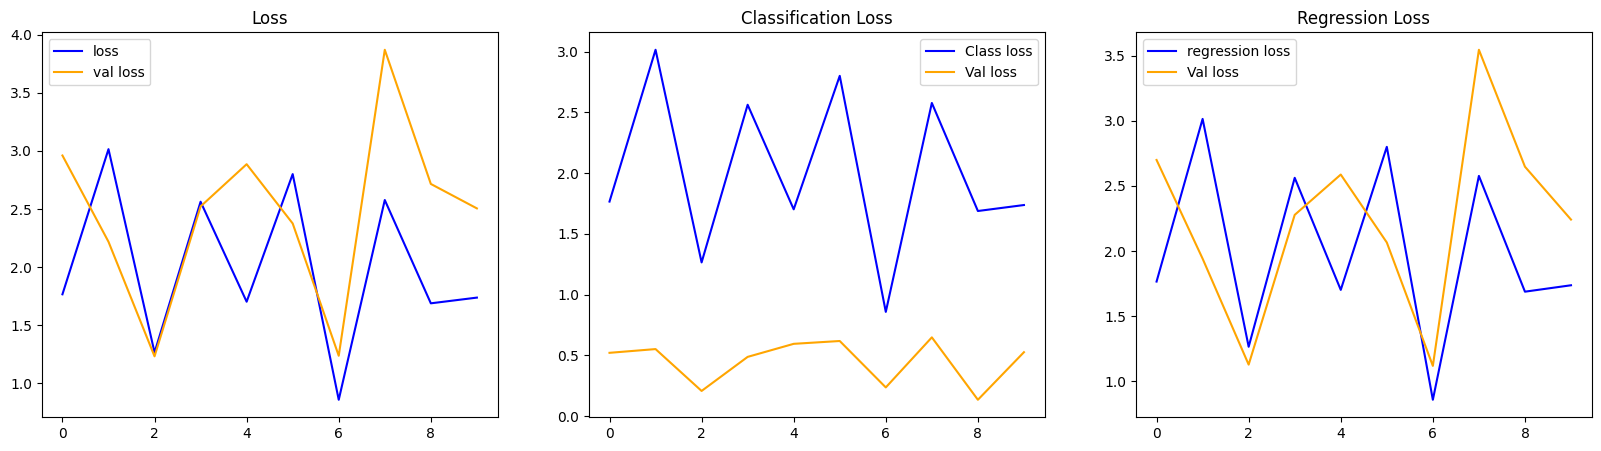

In [ ]:
fig,ax =plt.subplots(ncols = 3,figsize=(20,5))


ax[0].plot(hist.history['total_loss'],color='blue',label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()


ax[1].plot(hist.history['total_loss'],color='blue',label='Class loss')
ax[1].plot(hist.history['val_class_loss'],color='orange',label='Val loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()


ax[2].plot(hist.history['total_loss'],color='blue',label='regression loss')
ax[2].plot(hist.history['val_regress_loss'],color='orange',label='Val loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [ ]:
test_data=test.as_numpy_iterator()

In [ ]:
test_example=test_data.next()

In [ ]:
y_hat=mo_del.predict(test_example[0])

1/1 [==============================] - 0s 24ms/step


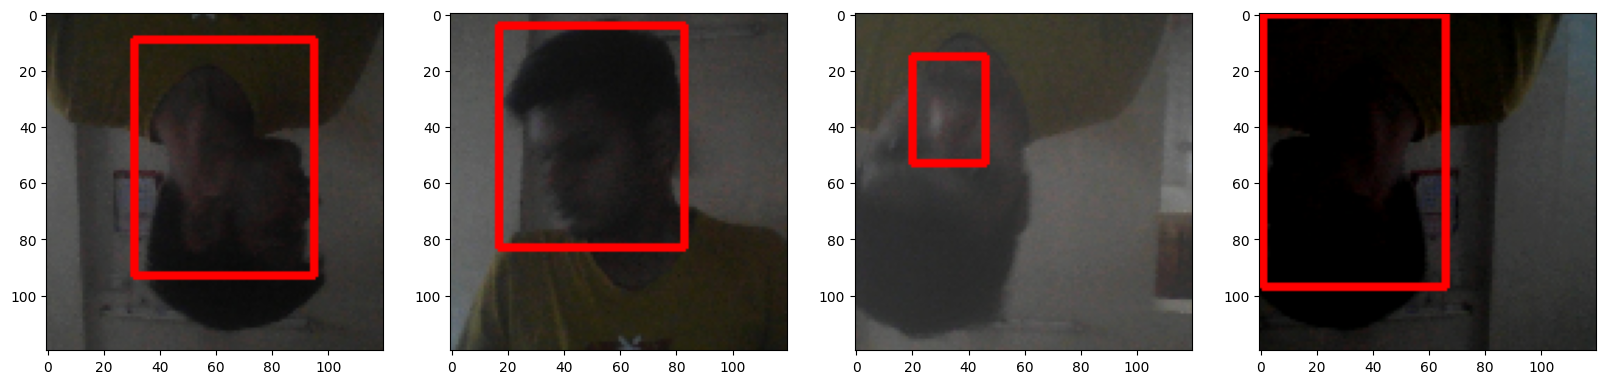

In [ ]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))

for i in range(4):
  sample_img=test_example[0][i]
  sample_coords=y_hat[1][i]

  if y_hat[0][i]>.5:
    cv2.rectangle(sample_img,
                  tuple(np.multiply(sample_coords[:2],[120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:],[120,120]).astype(int)),
                  (255,0,0),2
                  )
  ax[i].imshow(sample_img)

In [ ]:


Model.save(mo_del,filepath='facetracker',save_format='tf')



In [ ]:
from tensorflow.keras.models import load_model
face = load_model('facetracker')

OSError: ignored

In [ ]:
test_example=test_data.next()

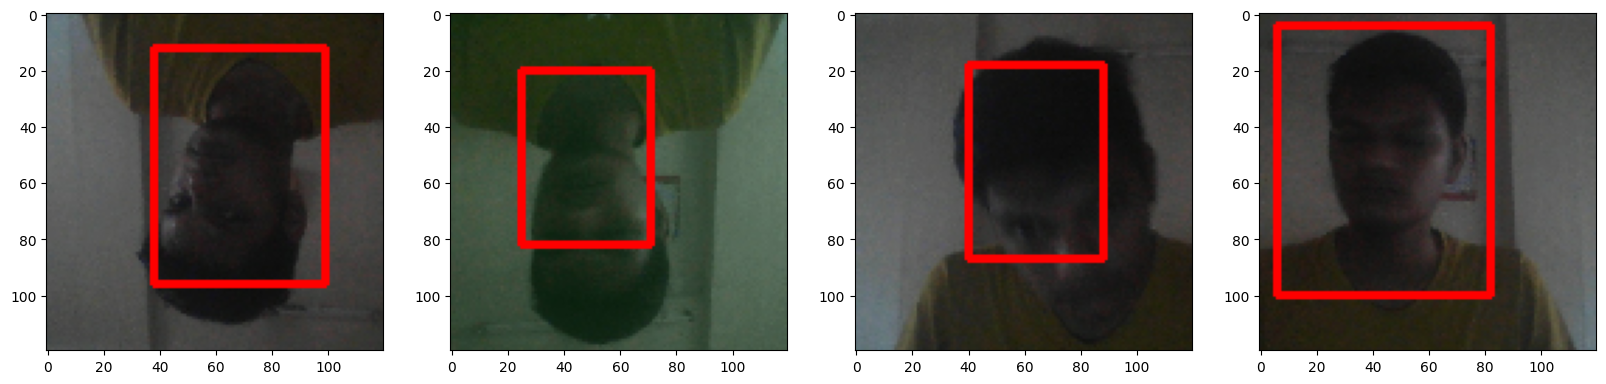

In [ ]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))

for i in range(4):
  sample_img=test_example[0][i]
  sample_coords=y_hat[1][i]

  if y_hat[0][i]>.5:
    cv2.rectangle(sample_img,
                  tuple(np.multiply(sample_coords[:2],[120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:],[120,120]).astype(int)),
                  (255,0,0),2
                  )
  ax[i].imshow(sample_img)

In [ ]:
y_hat=face.predict(test_example[0])

1/1 [==============================] - 0s 23ms/step


In [1]:
while not (cap.isOpened()):
    ret, frame = cap.read()
    frame = frame[50:500, 50:500,:]
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))

    yhat = face.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]


    if yhat[0] > 0.5:
        # Controls the main rectangle
        cv2.rectangle(frame,
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)),
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame,
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])),
                            (255,0,0), -1)
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)


    cv2.imshow('EyeTrack', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()